# ***Crop Recomendation Model 2 (Advance Model)***

## *Features (Advance)*
*   N (Nitrogen)
*   P (Phosphorus)
*   K (Potassium)
*   Soil
*   Humidity
*   Temprature
*   Ph
*   Rainfall




## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
import warnings
import seaborn as sns
import pickle

warnings.filterwarnings('ignore')

## Reading The Dataset

In [45]:
# crops_with_soil_df1 = pd.read_csv("/content/drive/MyDrive/Dataset/Crops/Crop_with_soil (i).csv")
crops_with_soil_df2 = pd.read_csv("/content/drive/MyDrive/Dataset/Crops/Crop_with_soil (ii).csv")

## Exploring The Dataset 2


In [46]:
# head
crops_with_soil_df2.head()

,N,P,K,temperature,humidity,ph,rainfall,soil,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,loamy,rice
1,90,42,43,20.879744,82.002744,6.502985,202.935536,clayey,rice
2,85,58,41,21.770462,80.319644,7.038096,226.655537,loamy,rice
3,85,58,41,21.770462,80.319644,7.038096,226.655537,clayey,rice
4,60,55,44,23.004459,82.320763,7.840207,263.964248,loamy,rice


In [47]:
#Important values
print(crops_with_soil_df2['label'].unique())
print(crops_with_soil_df2['soil'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
['loamy' 'clayey' 'sandy' 'black' 'red']


In [48]:
# Shapes
print("The Shape of the Dataset is: {}" .format(crops_with_soil_df2.shape))

The Shape of the Dataset is: (4200, 9)


In [49]:
# Data types
print("crop dataset type 2\n")
print(crops_with_soil_df2.dtypes)

crop dataset type 2

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
soil            object
label           object
dtype: object


In [50]:
# Descriptive Statistics
crops_with_soil_df2.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,50.602857,53.564286,47.132619,25.251938,66.006550,6.461486,112.217093
std,35.424926,30.262182,46.234302,5.252465,25.792847,0.780216,55.682125
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,23.000000,31.000000,21.000000,21.811676,50.829480,5.933683,69.867126
50%,38.000000,55.000000,32.000000,25.242051,75.474122,6.417942,97.318949
75%,82.000000,68.000000,49.000000,28.200543,86.643042,6.932537,151.076190
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [51]:
# Knowing unique values and there length
print("Number of labels: {}".format(crops_with_soil_df2['label'].nunique()))
print(crops_with_soil_df2['label'].value_counts())

Number of labels: 22
chickpea       400
kidneybeans    300
pigeonpeas     300
jute           300
coconut        300
rice           200
maize          200
cotton         200
papaya         200
watermelon     200
grapes         200
mango          200
blackgram      200
coffee         200
banana         100
pomegranate    100
muskmelon      100
apple          100
orange         100
lentil         100
mungbean       100
mothbeans      100
Name: label, dtype: int64


In [52]:
# Check null values
print("crop dataset type 2\n")
print(crops_with_soil_df2.isnull().any())

crop dataset type 2

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
soil           False
label          False
dtype: bool


## Data visualization

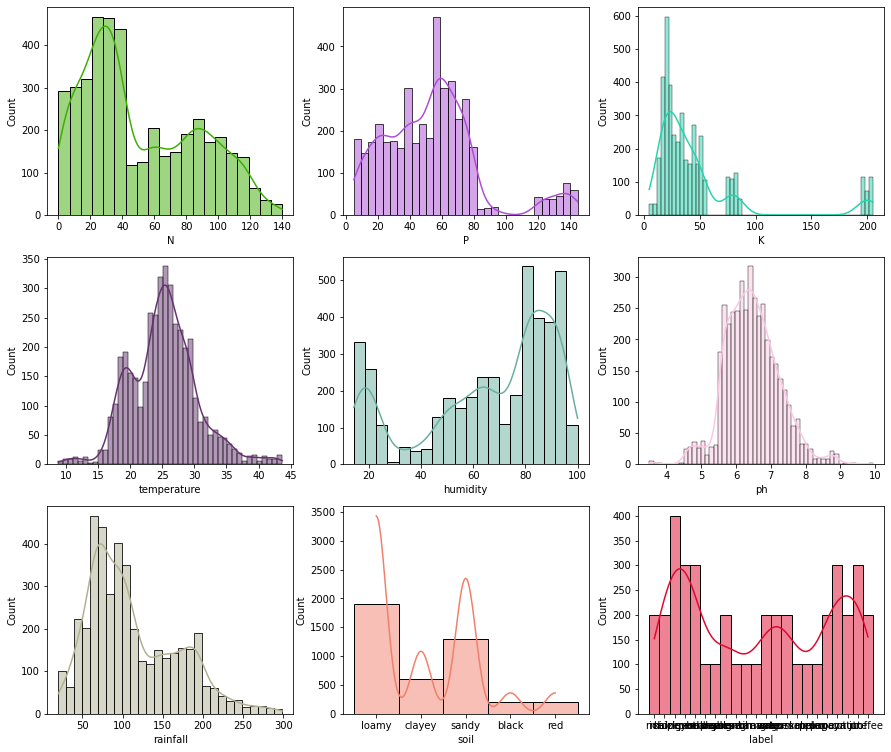

In [53]:
columns1 = crops_with_soil_df2.columns
#Distribution
plt.figure(figsize=(15,13))
i = 1
for column in columns1:
    plt.subplot(3,3,i)
    rgb = np.random.rand(3,)
    sns.histplot(crops_with_soil_df2[column], kde = True, color = rgb, element = 'bars')
    i+=1
plt.show()

### Target values report

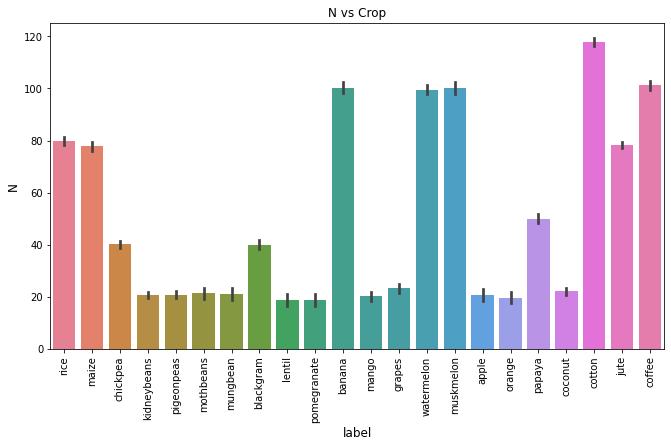

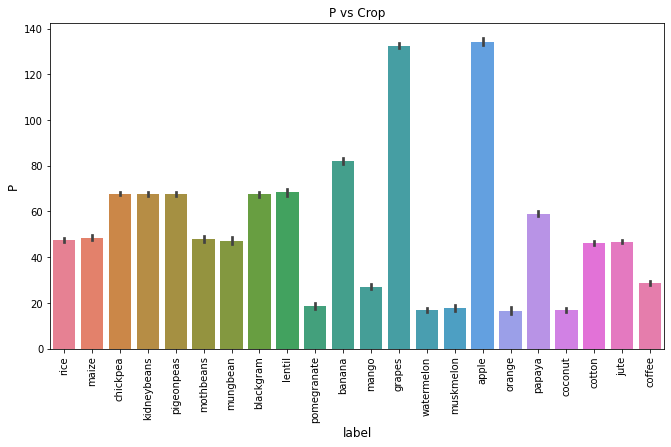

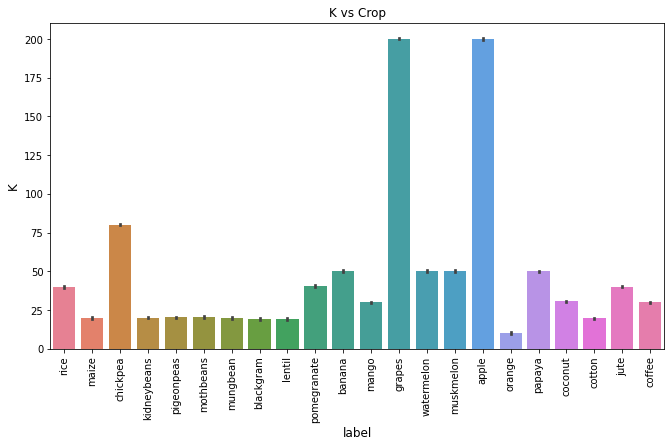

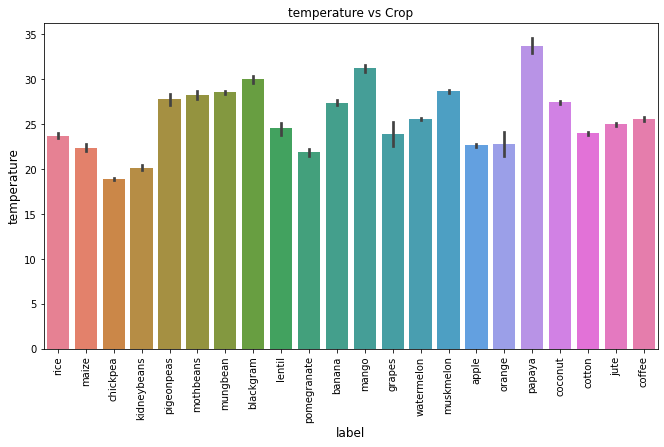

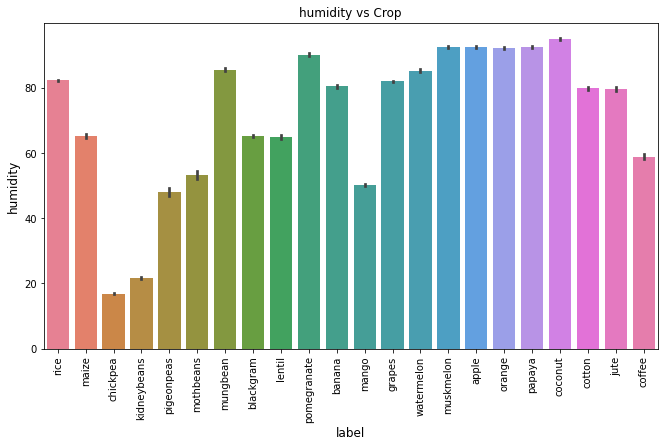

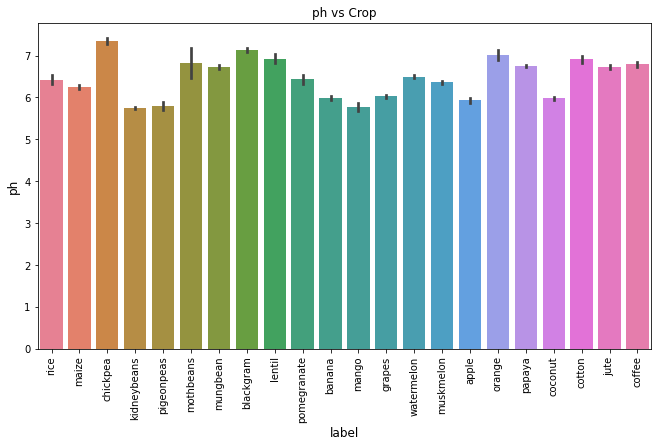

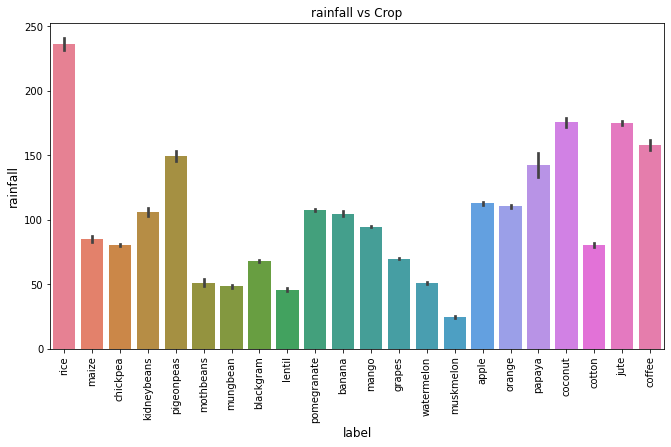

In [54]:
numericColumns = columns1[:-2]
for column in numericColumns:
    plt.figure(figsize = (11, 6))
    sns.barplot(data = crops_with_soil_df2, x = 'label', y = column,  palette = 'husl')
    plt.xlabel('label', fontsize = 12)
    plt.ylabel(column, fontsize = 12)
    plt.xticks(rotation=90)
    plt.title(f'{column} vs Crop')
    plt.show()

<Figure size 720x1224 with 0 Axes>

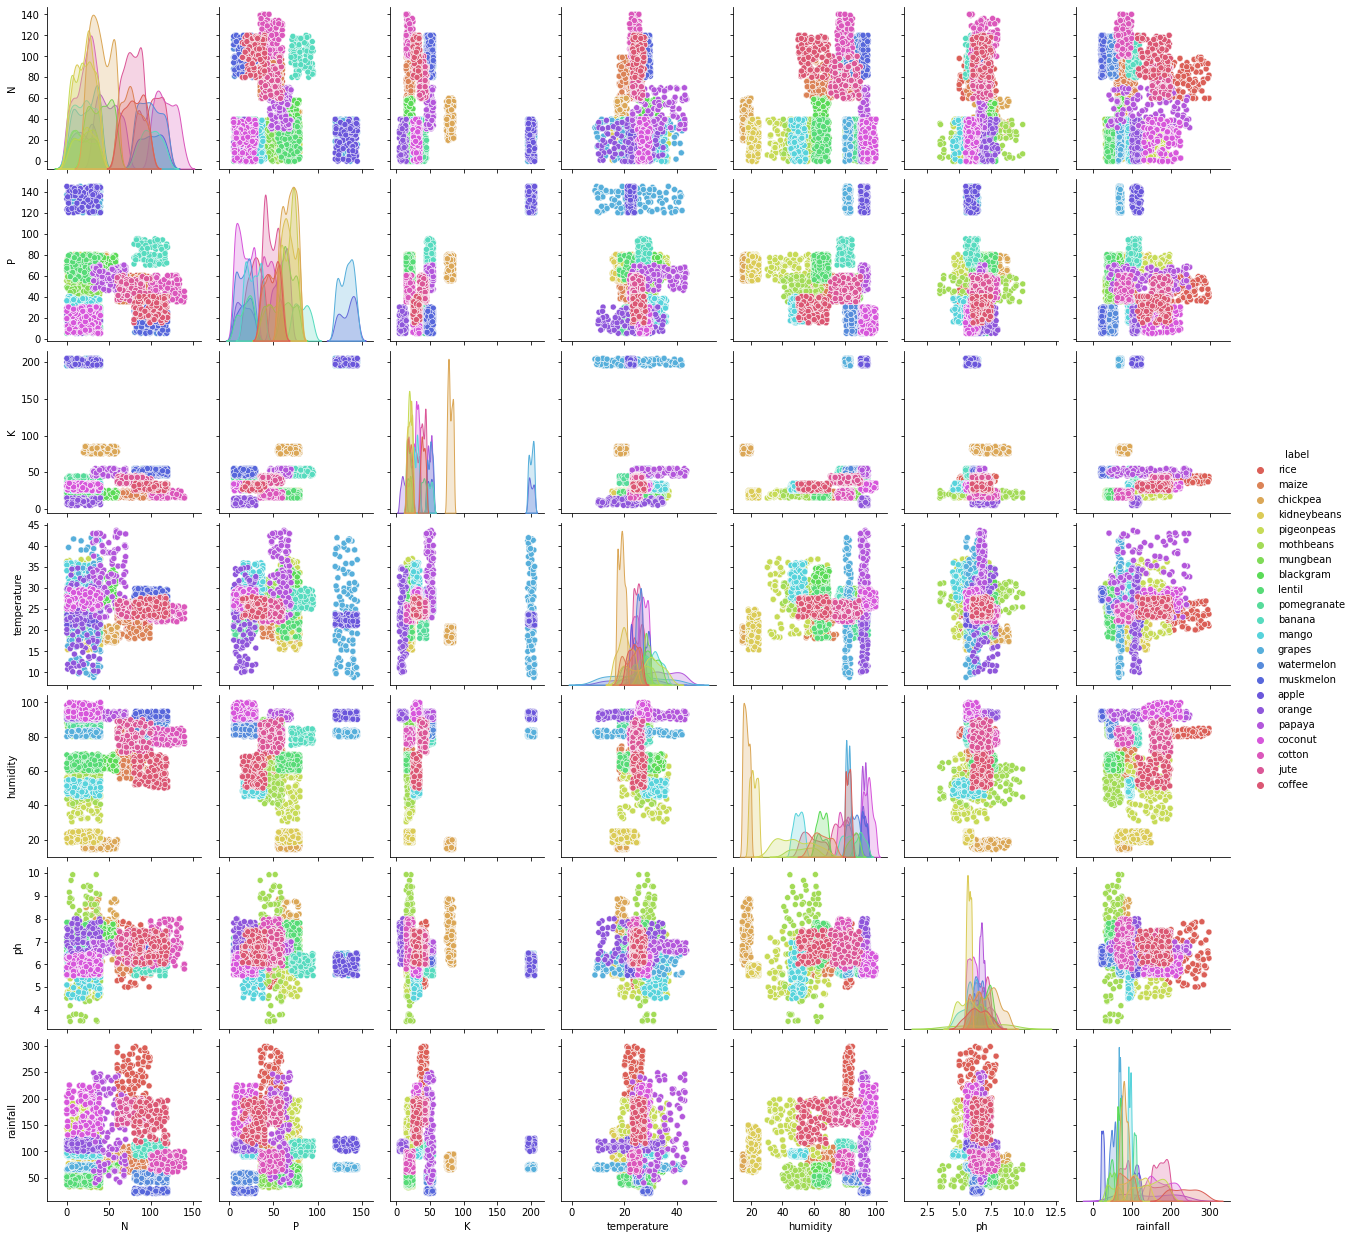

In [55]:
plt.figure(figsize = (10, 17))
sns.pairplot(crops_with_soil_df2, hue = 'label', palette = 'hls')
plt.show()

### Correlation Matrix

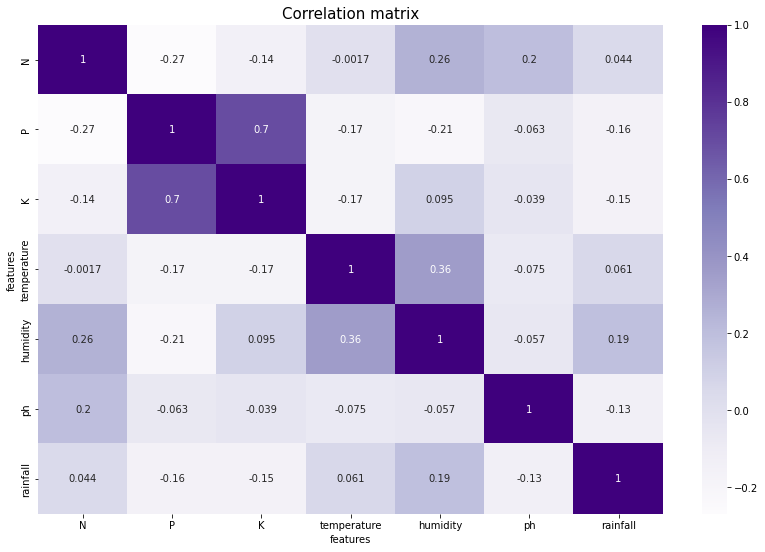

In [56]:
#Correlation matrix dataset 1
fig, ax = plt.subplots(1, 1, figsize=(14, 9))
sns.heatmap(crops_with_soil_df2.corr(), annot=True,cmap='Purples')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation matrix', fontsize = 15, c='black')
plt.show()

### Boxplots

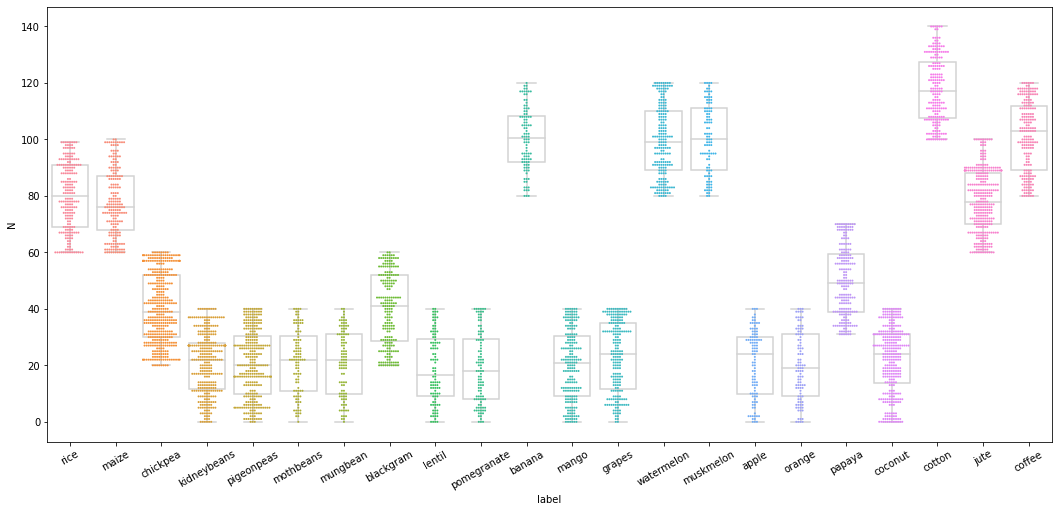

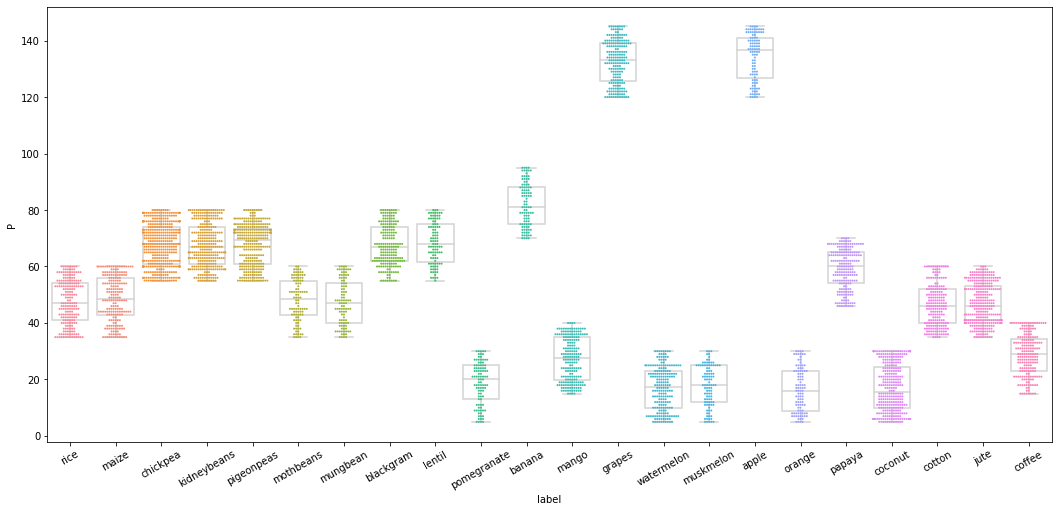

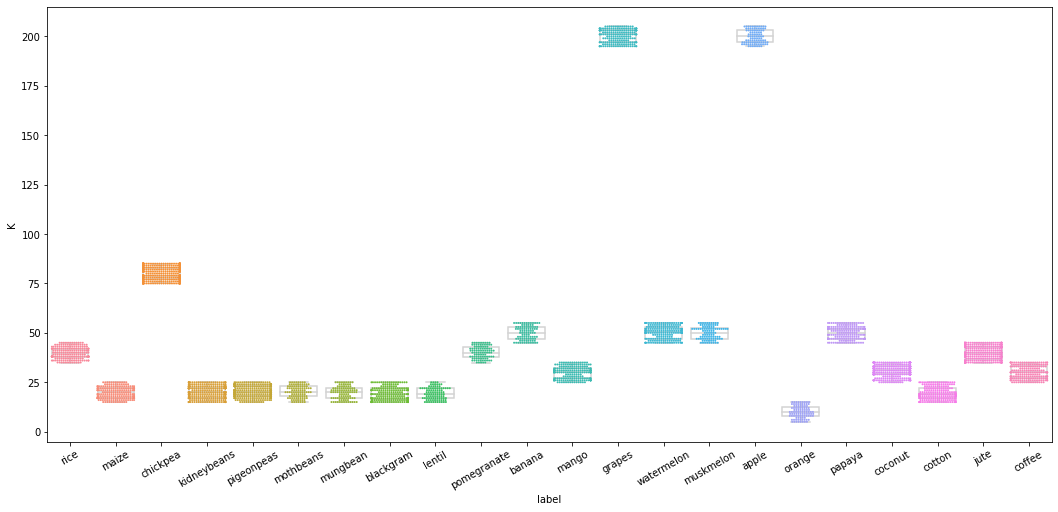

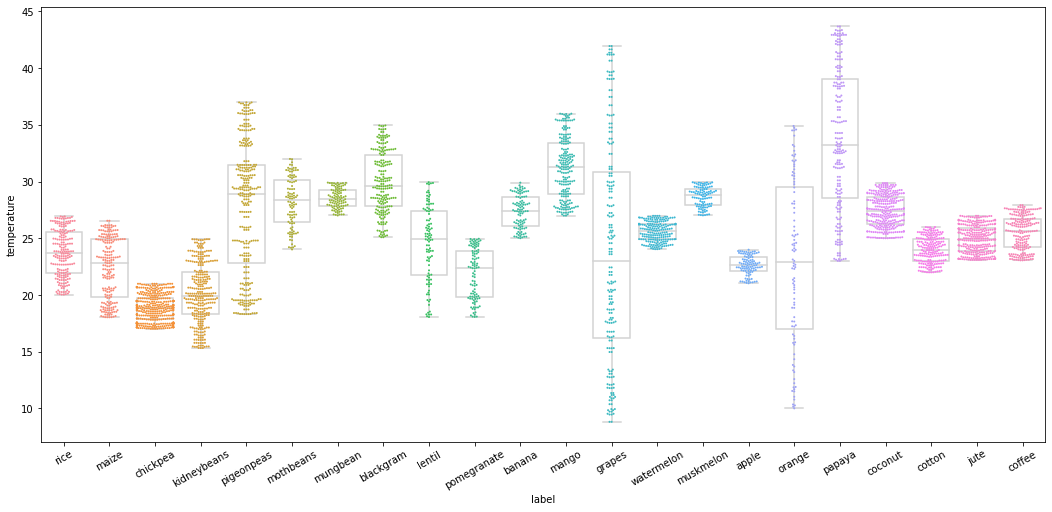

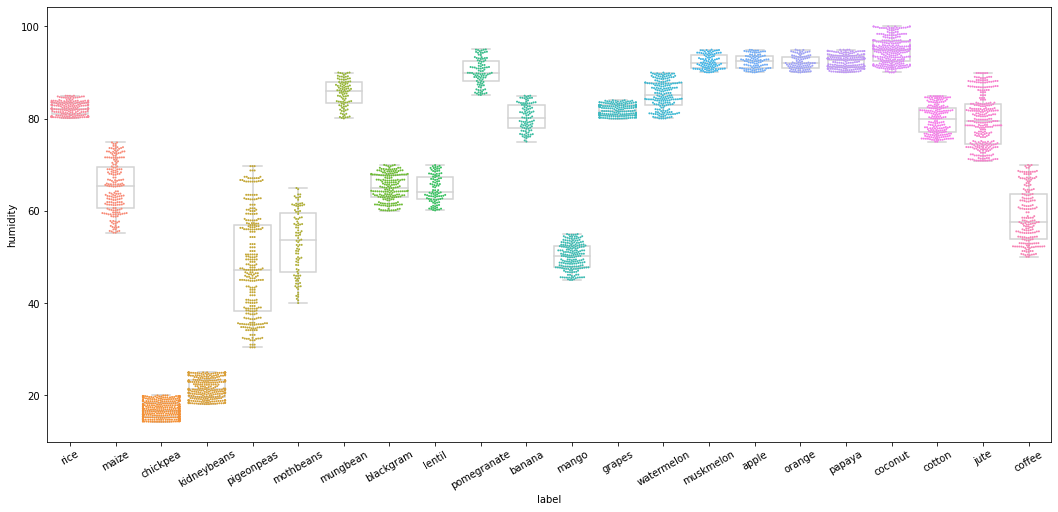

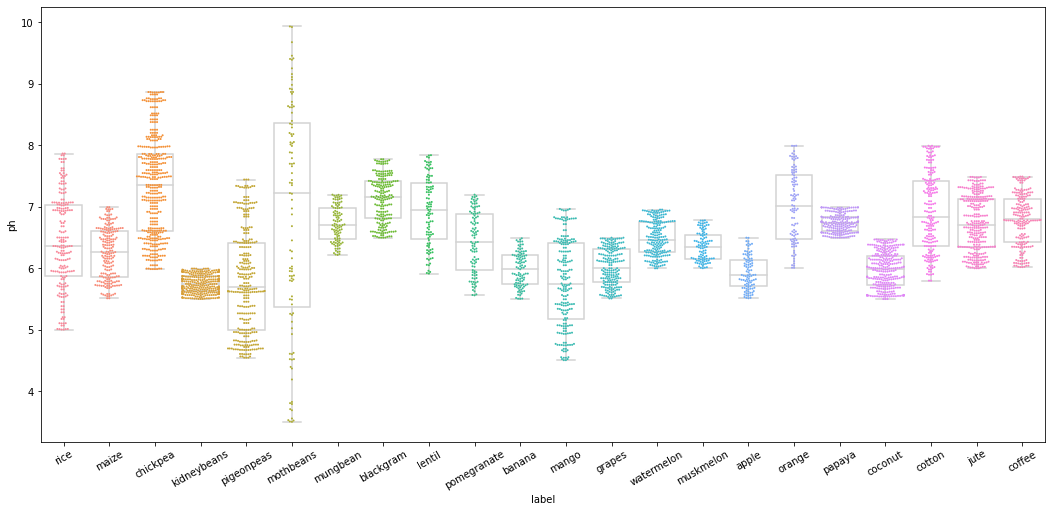

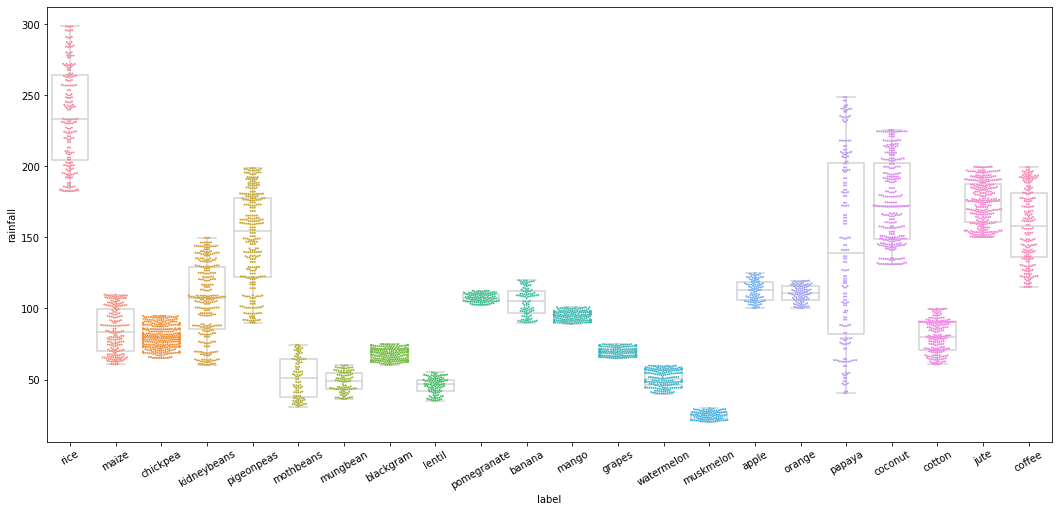

In [57]:
# Boxplots by themselves are misleading (and Violinplots are exhausting)
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor': 'lightgrey'},
    'medianprops':{'color':'lightgrey'},
    'whiskerprops':{'color':'lightgrey'},
    'capprops':{'color':'lightgrey'}
}
X = crops_with_soil_df2.drop(['label'], axis=1)
Y = X.drop(['soil'], axis=1)


for col in Y.columns:
    plt.figure(figsize = (18,8))
    ax = sns.boxplot(x="label", y=col, data=crops_with_soil_df2, **PROPS)
    ax = sns.swarmplot(x="label", y=col, data=crops_with_soil_df2, size=2)
    plt.xticks(rotation = 30)
    plt.show()

# Encoding and Fitting

In [58]:
le2 = preprocessing.LabelEncoder()

crops_with_soil_df2['soil'] = le2.fit_transform(crops_with_soil_df2['soil'])
print(crops_with_soil_df2.head())

    N   P   K  temperature   humidity        ph    rainfall  soil label
0  90  42  43    20.879744  82.002744  6.502985  202.935536     2  rice
1  90  42  43    20.879744  82.002744  6.502985  202.935536     1  rice
2  85  58  41    21.770462  80.319644  7.038096  226.655537     2  rice
3  85  58  41    21.770462  80.319644  7.038096  226.655537     1  rice
4  60  55  44    23.004459  82.320763  7.840207  263.964248     2  rice


In [59]:
features_df2 = crops_with_soil_df2[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall', 'soil']]
target_df2 = crops_with_soil_df2['label']
labels_df2 = crops_with_soil_df2['label']

In [60]:
from sklearn.model_selection import train_test_split
Xtrain_df2, Xtest_df2, Ytrain_df2, Ytest_df2 = train_test_split(features_df2,target_df2,test_size = 0.2,random_state =2)

# Model

In [61]:
from sklearn.ensemble import RandomForestClassifier

RF_df2 = RandomForestClassifier(n_estimators=20, random_state=0)
RF_df2.fit(Xtrain_df2,Ytrain_df2)

RandomForestClassifier(n_estimators=20, random_state=0)

# Predict Accuracy

In [62]:
predicted_values_df2 = RF_df2.predict(Xtest_df2)

x_df2 = metrics.accuracy_score(Ytest_df2, predicted_values_df2)
print("RF's Accuracy of 2nd Dataset is: ", x_df2)

RF's Accuracy of 2nd Dataset is:  0.9976190476190476


# Report

In [63]:
print(classification_report(Ytest_df2,predicted_values_df2))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        42
    chickpea       1.00      1.00      1.00        89
     coconut       1.00      1.00      1.00        67
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        38
      grapes       1.00      1.00      1.00        43
        jute       0.97      1.00      0.98        58
 kidneybeans       1.00      1.00      1.00        59
      lentil       1.00      1.00      1.00        21
       maize       1.00      1.00      1.00        49
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      1.00      1.00        11
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        21
      papaya       1.00    

# Confusion Matrix

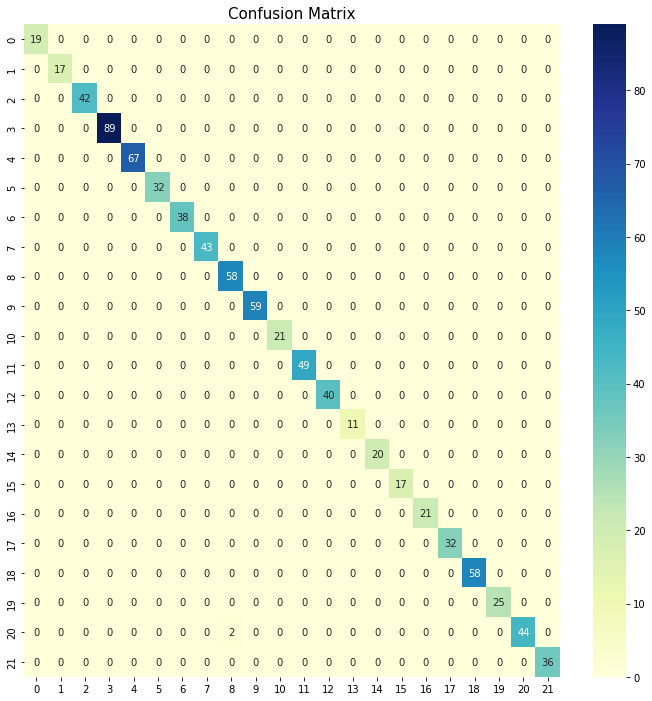

In [64]:
#Confusion matrix
plt.figure(figsize=(12,12))
cm = metrics.confusion_matrix(Ytest_df2, predicted_values_df2)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

# Prediction

In [67]:
def call_advance_model(n,p,k,soil, temp, humidity, ph, rainfall):
  data_df2 = np.array([[n,p,k,temp, humidity, ph, rainfall, soil]])
  prediction2 = RF_df2.predict(data_df2)
  print(prediction2)

def engine():
  print("Please input values\n")
  n = input("please enter n value\n")
  p= input("please enter p value\n")
  k= input("please enter k value\n")
  soil = input("please choose soil type\n")
  temp = input("please input temp\n")
  humi = input("enter humidity\n")
  ph = input("please enter ph \n")
  rain = input("please enter also rainfall in mm\n")
  convertedLabel = le2.transform([soil])
  call_advance_model(int(n),int(p),int(k),convertedLabel, int(temp),int(humi),int(ph), int(rain))

engine()
 


Please input values

please enter n value
20
please enter p value
15
please enter k value
16
please choose soil type
sandy
please input temp
22
enter humidity
18
please enter ph 
5
please enter also rainfall in mm
62
['kidneybeans']


# Saving Model

In [68]:
# save the model to disk
filename = 'crops_recomendation_model2.pickle'
path = "/content/drive/MyDrive/TrainedModels/"
pickle_out = open(path+filename, 'wb')
pickle.dump(RF_df2, pickle_out)
pickle_out.close()

# Loading Model

In [69]:
filename = 'crops_recomendation_model2.pickle'
path = "/content/drive/MyDrive/TrainedModels/"
pickle_in = open(path+filename, 'rb')
crops_recomendation_model2 = pickle.load(pickle_in)

# Checking Model and printing Results

In [72]:
results = crops_recomendation_model2.score(Xtest_df2, Ytest_df2)
print(results)
def engine():
  print("Please input values\n")
  n = input("please enter n value\n")
  p= input("please enter p value\n")
  k= input("please enter k value\n")
  soil = input("please choose soil type\n")
  temp = input("please input temp\n")
  humi = input("enter humidity\n")
  ph = input("please enter ph \n")
  rain = input("please enter also rainfall in mm\n")
  convertedLabel = le2.transform([soil])
  data = np.array([[int(n),int(p),int(k),convertedLabel, int(temp),int(humi),int(ph), int(rain)]])
  prediction_crop = crops_recomendation_model2.predict(data)
  print(prediction_crop)
  

engine()

0.9976190476190476
Please input values

please enter n value
80
please enter p value
78
please enter k value
80
please choose soil type
loamy
please input temp
32
enter humidity
80
please enter ph 
6
please enter also rainfall in mm
200
['chickpea']
